## ANÁLISIS COMPARATIVO DE CALCIO EN SUERO Y SANGRE TOTAL

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import pearsonr

# EXPORTACIÓN DE DATOS DE EXCEL Y PREPARACIÓN DE LOS DATOS PARA TRABAJAR

In [13]:
ruta_archivo = 'Calcio ionico heparina y suero.xlsx'
columnas_interes = ['Nº petición', 'CALION heparina', 'CALION suero']

df = pd.read_excel(ruta_archivo, usecols=columnas_interes)

print(df.head())

df.to_csv('calcio_comparacion.csv', index=False)

print("Datos extraídos y guardados correctamente en 'calcio_comparacion.csv'")


   Nº petición  CALION heparina  CALION suero
0      1249800            4.213         5.584
1      1258070            4.709         5.950
2      1267131            4.464         5.642
3      1256339            4.675         5.835
4      1257345            4.454         5.502
Datos extraídos y guardados correctamente en 'calcio_comparacion.csv'


# COEFICIENTE DE CORRELACIÓN DE PEARSON

In [14]:
df = pd.read_csv('calcio_comparacion.csv')

df = df.dropna(subset=['CALION heparina', 'CALION suero'])

sangre = df['CALION heparina']
suero = df['CALION suero']

r, p_value = pearsonr(sangre, suero)

print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Valor p: {p_value:.4e}")

Coeficiente de correlación de Pearson (r): 0.9511
Valor p: 2.8016e-31


# ANÁLISIS DE BLAND-ALTMAN

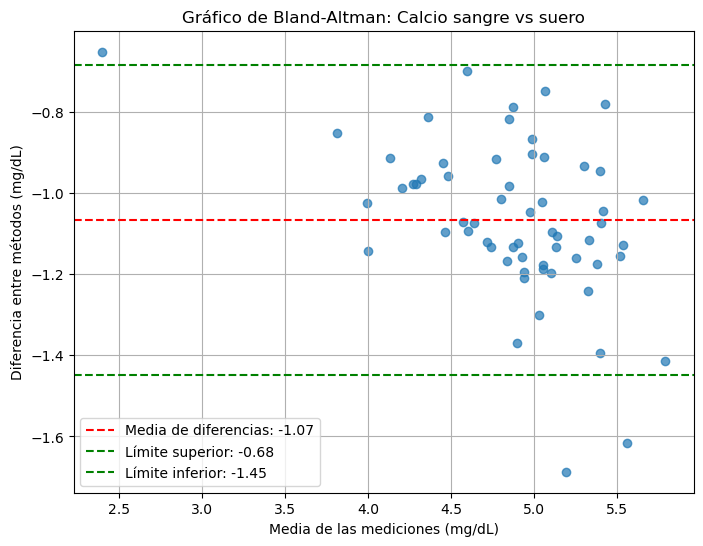

Media de las diferencias: -1.0658
Límite superior (IC95%): -0.6837
Límite inferior (IC95%): -1.4479


In [15]:
df = pd.read_csv('calcio_comparacion.csv')

df = df.dropna(subset=['CALION heparina', 'CALION suero'])

sangre = df['CALION heparina']
suero = df['CALION suero']

media = (sangre + suero) / 2
diferencia = sangre - suero

media_diff = np.mean(diferencia)
sd_diff = np.std(diferencia, ddof=1)

limite_superior = media_diff + 1.96 * sd_diff
limite_inferior = media_diff - 1.96 * sd_diff

plt.figure(figsize=(8, 6))
plt.scatter(media, diferencia, alpha=0.7)
plt.axhline(media_diff, color='red', linestyle='--', label=f'Media de diferencias: {media_diff:.2f}')
plt.axhline(limite_superior, color='green', linestyle='--', label=f'Límite superior: {limite_superior:.2f}')
plt.axhline(limite_inferior, color='green', linestyle='--', label=f'Límite inferior: {limite_inferior:.2f}')
plt.title('Gráfico de Bland-Altman: Calcio sangre vs suero')
plt.xlabel('Media de las mediciones (mg/dL)')
plt.ylabel('Diferencia entre métodos (mg/dL)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Media de las diferencias: {media_diff:.4f}")
print(f"Límite superior (IC95%): {limite_superior:.4f}")
print(f"Límite inferior (IC95%): {limite_inferior:.4f}")


# REGRESIÓN PASSING BABLOCK

In [16]:
df = pd.read_csv('calcio_comparacion.csv')

df = df.dropna(subset=['CALION heparina', 'CALION suero'])

x = df['CALION heparina']
y = df['CALION suero']

slopes = []
for i in range(len(x)):
    for j in range(i + 1, len(x)):
        if x[j] != x[i]:
            slopes.append((y[j] - y[i]) / (x[j] - x[i]))

slope_pb = np.median(slopes)

intercepts = y - slope_pb * x
intercept_pb = np.median(intercepts)

n_slopes = len(slopes)
sorted_slopes = np.sort(slopes)
lower_slope_idx = int((n_slopes - 1) * 0.025)
upper_slope_idx = int((n_slopes - 1) * 0.975)
slope_ci = (sorted_slopes[lower_slope_idx], sorted_slopes[upper_slope_idx])

n_intercepts = len(intercepts)
sorted_intercepts = np.sort(intercepts)
lower_intercept_idx = int((n_intercepts - 1) * 0.025)
upper_intercept_idx = int((n_intercepts - 1) * 0.975)
intercept_ci = (sorted_intercepts[lower_intercept_idx], sorted_intercepts[upper_intercept_idx])

print(f'Ecuación de Passing-Bablok: y = {intercept_pb:.4f} + {slope_pb:.4f} x')
print(f'Ordenada en el origen (IC95%): {intercept_pb:.4f} ({intercept_ci[0]:.4f} a {intercept_ci[1]:.4f})')
print(f'Pendiente (IC95%): {slope_pb:.4f} ({slope_ci[0]:.4f} a {slope_ci[1]:.4f})')

Ecuación de Passing-Bablok: y = 0.6367 + 1.1008 x
Ordenada en el origen (IC95%): 0.6367 (0.2744 a 0.9465)
Pendiente (IC95%): 1.1008 (-3.1667 a 6.2000)
